I work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

I want to know the following:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1128]:
import pandas as pd, numpy as np

In [1129]:
dete_survey = pd.read_csv('dete_survey.csv')
#("dete-exit-survey-january-2014.csv")

In [1130]:
tafe_survey = pd.read_csv("tafe_survey.csv")
#('tafe-employee-exit-survey-access-database-december-2013.csv', encoding = 'windows-1252')
#'unicode_escape'

In [1131]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [1132]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [1133]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [1134]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We can first make the following observations:
- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

In [1135]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [1136]:
print(type(dete_survey))

<class 'pandas.core.frame.DataFrame'>


In [1137]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
type(dete_survey_updated)

pandas.core.frame.DataFrame

In [1138]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)
type(dete_survey_updated)

pandas.core.frame.DataFrame

we handled the first two issues.
1. The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
2. Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis. 

Recall that we can use the pd.read_csv() function to specify values that should be represented as NaN. We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.

In [1139]:
print(dete_survey_updated)

      ID                        SeparationType Cease Date  DETE Start Date  \
0      1                 Ill Health Retirement    08/2012           1984.0   
1      2      Voluntary Early Retirement (VER)    08/2012              NaN   
2      3      Voluntary Early Retirement (VER)    05/2012           2011.0   
3      4             Resignation-Other reasons    05/2012           2005.0   
4      5                        Age Retirement    05/2012           1970.0   
5      6             Resignation-Other reasons    05/2012           1994.0   
6      7                        Age Retirement    05/2012           1972.0   
7      8                        Age Retirement    05/2012           1988.0   
8      9             Resignation-Other reasons    07/2012           2009.0   
9     10            Resignation-Other employer       2012           1997.0   
10    11                        Age Retirement       2012           1999.0   
11    12  Resignation-Move overseas/interstate       2012       

In [1140]:
print(type(dete_survey_updated))
print(type(tafe_survey_updated))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [1141]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()

In [1142]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [1143]:
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id','CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',
                                                         'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
                                                         'Employment Type. Employment Type': 'employment_status',
                                                          'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                                          'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
})

In [1144]:
tafe_survey_updated.head() 

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


 Each dataframe contains many of the same columns, but the column names are different.
 Because we eventually want to combine them, we have to standardize the column names.

If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

Note that dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

Resignation-Other reasons
Resignation-Other employer
Resignation-Move overseas/interstate
Remember that we'll have to account for each of these variations so we don't unintentionally drop data!

In this step, note that you may see what is known as a SettingWithCopy Warning. This won't prevent your code from running properly but it's just letting you know that whatever operation you're doing is trying to be set on a copy of a slice from a dataframe.

In [1145]:
dete_survey_updated_unique = dete_survey_updated["separationtype"].value_counts()
print(dete_survey_updated_unique)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


In [1146]:
type(dete_survey_updated)

pandas.core.frame.DataFrame

In [1147]:
tafe_survey_updated_unique = tafe_survey_updated["separationtype"].value_counts()
print(tafe_survey_updated_unique)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [1148]:
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype'] == 'Resignation'] #["separationtype"].groupby("Resignation")

In [1149]:
dete_resignations = dete_survey_updated.loc[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') | 
                                            (dete_survey_updated['separationtype'] =='Resignation-Other employer') | 
                                            (dete_survey_updated['separationtype'] =='Resignation-Move overseas/interstate')]
                                        
dete_resignations.head()


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [1150]:
dete_resignations.tail()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
808,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
815,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,12/2013,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). 
In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.

- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.


In [1151]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [1152]:
dete_resignations["cease_date"].head()

3     05/2012
5     05/2012
8     07/2012
9        2012
11       2012
Name: cease_date, dtype: object

In [1153]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(pattern, expand=True).astype(float)

#value_counts = years["cease_date"].value_counts()
#print(years.value_counts())
#print(years)

/Users/annascott/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1154]:
dete_resignations["cease_date"].head()

3     2012.0
5     2012.0
8     2012.0
9     2012.0
11    2012.0
Name: cease_date, dtype: float64

In [1155]:
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [1156]:
type(dete_resignations)

pandas.core.frame.DataFrame

In [1157]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

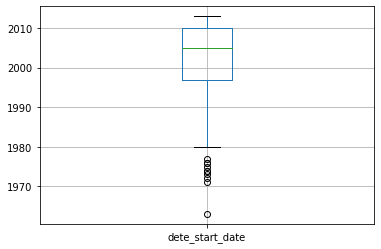

In [1158]:
dete_resignations.boxplot(column='dete_start_date')

In [1159]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

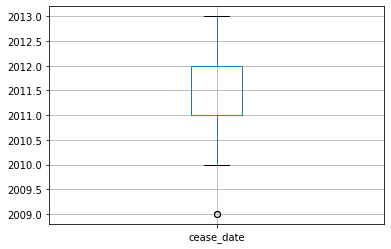

In [1160]:
tafe_resignations.boxplot(column ='cease_date')

From the work we did, we can verify:

- There aren't any major issues with the years.
- The years in each dataframe don't span quite the same number of years. We might drop any years we don't think are needed for the analysis.

Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

You may have noticed that the tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

In [1161]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null float64
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_envir

In [1162]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [1163]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

/Users/annascott/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1164]:
print(dete_resignations['institute_service'] )

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
16      NaN
20     30.0
21     32.0
22     15.0
23     39.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
39      NaN
40     35.0
41     38.0
42      1.0
43     36.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
       ... 
747     6.0
751     8.0
752    15.0
753     9.0
755     1.0
762     0.0
766     7.0
769     5.0
770     NaN
771    12.0
774     NaN
784     0.0
786    20.0
788     NaN
789    31.0
790     6.0
791     NaN
794     NaN
797     NaN
798     NaN
802     NaN
803    10.0
804     6.0
806     8.0
807     9.0
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64


we created a new institute_service column that we'll use to analyze survey respondents according to their length of employment.Next, we'll identify any employees who resigned because they were dissatisfied.

In [1165]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [1166]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [1167]:
type(tafe_resignations['Contributing Factors. Job Dissatisfaction'])

pandas.core.series.Series

In [1168]:
def update_val(val):
    if  val == 'Nan':
        return np.nan
    elif val == '-':
        return False
    else:
        return True 
    

In [1169]:
cells_to_update = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

In [1170]:
type(tafe_resignations[cells_to_update])

pandas.core.frame.DataFrame

In [1171]:
tafe_resignations[cells_to_update] = tafe_resignations[cells_to_update].applymap(update_val)

/Users/annascott/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [1172]:
(tafe_resignations.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
id                                                     340 non-null float64
Institute                                              340 non-null object
WorkArea                                               340 non-null object
cease_date                                             335 non-null float64
separationtype                                         340 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. Dissatisfaction                  340 non-null bool
Contributing Factors. Job Dissatisfaction              340 non-null bo

In [1173]:
tafe_resignations['dissatisfied'] = tafe_resignations[cells_to_update].any(axis=1, skipna=False)

/Users/annascott/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1174]:
tafe_resignations_up = tafe_resignations

In [1175]:
tafe_resignations_up.head(20)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2,False
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year,False
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year,False
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10,True


In [1176]:
dete_resignations['dissatisfied'] = dete_resignations.any(axis=1, skipna=False)

/Users/annascott/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1177]:
type(dete_resignations)

pandas.core.frame.DataFrame

In [1178]:
dete_resignations_up = dete_resignations

In [1179]:
type(dete_resignations_up)

pandas.core.frame.DataFrame

In [1180]:
(dete_resignations_up).head(20)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,True
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True
12,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,True
14,15,Resignation-Other employer,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,5.0,True
16,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,True
20,21,Resignation-Other employer,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,True,Male,56-60,NaN,NaN,NaN,NaN,NaN,30.0,True
21,22,Resignation-Other reasons,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,Female,51-55,NaN,NaN,NaN,NaN,NaN,32.0,True


To recap, we've accomplished the following:

- Renamed our columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
-Created a new column indicating if an employee resigned because they were dissatisfied in some way
Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column.

In [1181]:
dete_resignations_up['institute'] = 'DETE'

/Users/annascott/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1182]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,True,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True,DETE


In [1183]:
tafe_resignations_up['institute'] = 'TAFE'

/Users/annascott/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1184]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

/Users/annascott/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [1185]:
type(combined)

pandas.core.frame.DataFrame

In [1186]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  340 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              340 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

In [1187]:
combined_updated = combined.dropna(thresh=500, axis=1)

In [1188]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         651 non-null bool
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: bool(1), float64(2), object(7)
memory usage: 46.5+ KB


In [1189]:
print(combined_updated['institute_service'])

0                     7
1                    18
2                     3
3                    15
4                     3
5                    14
6                     5
7                   NaN
8                    30
9                    32
10                   15
11                   39
12                   17
13                    7
14                    9
15                    6
16                    1
17                  NaN
18                   35
19                   38
20                    1
21                   36
22                    3
23                    3
24                   19
25                    4
26                    9
27                    1
28                    6
29                    1
             ...       
621                 1-2
622                 3-4
623                 5-6
624                 NaN
625                 NaN
626                 3-4
627                 NaN
628    Less than 1 year
629    Less than 1 year
630                 1-2
631    Less than

we'll clean up the institute_service column.

In [1190]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


In [1191]:
institute_service_string = combined_updated['institute_service'].astype(str)

In [1192]:
institute_service_string = institute_service_string.str.replace('Less than 1 year', '0.5')

In [1193]:
institute_service_string = institute_service_string.str.replace('1-2', '1.5')

In [1194]:
institute_service_string = institute_service_string.str.replace('3-4', '3.5')

In [1195]:
institute_service_string = institute_service_string.str.replace('5-6', '5.5')

In [1196]:
institute_service_string = institute_service_string.str.replace('7-10', '9')

In [1198]:
institute_service_string = institute_service_string.str.replace('More than 20 years', '25')

In [1199]:
institute_service_string = institute_service_string.str.replace('11-20', '15')

In [1200]:
institute_service_string = pd.Series(list(map(float,institute_service_string)))

In [1201]:
print(institute_service_string)

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
5      14.0
6       5.0
7       NaN
8      30.0
9      32.0
10     15.0
11     39.0
12     17.0
13      7.0
14      9.0
15      6.0
16      1.0
17      NaN
18     35.0
19     38.0
20      1.0
21     36.0
22      3.0
23      3.0
24     19.0
25      4.0
26      9.0
27      1.0
28      6.0
29      1.0
       ... 
621     1.5
622     3.5
623     5.5
624     NaN
625     NaN
626     3.5
627     NaN
628     0.5
629     0.5
630     1.5
631     0.5
632     3.5
633     1.5
634     0.5
635     0.5
636     0.5
637     3.5
638     1.5
639     5.5
640     5.5
641     0.5
642     NaN
643     3.5
644     1.5
645     NaN
646     5.5
647     1.5
648     NaN
649     5.5
650     3.5
Length: 651, dtype: float64


In [1202]:
institute_service_string = institute_service_string.dropna()

In [1203]:
print(institute_service_string)

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
5      14.0
6       5.0
8      30.0
9      32.0
10     15.0
11     39.0
12     17.0
13      7.0
14      9.0
15      6.0
16      1.0
18     35.0
19     38.0
20      1.0
21     36.0
22      3.0
23      3.0
24     19.0
25      4.0
26      9.0
27      1.0
28      6.0
29      1.0
30      5.0
31     26.0
       ... 
615     5.5
616     9.0
617     3.5
618     1.5
619     0.5
620     0.5
621     1.5
622     3.5
623     5.5
626     3.5
628     0.5
629     0.5
630     1.5
631     0.5
632     3.5
633     1.5
634     0.5
635     0.5
636     0.5
637     3.5
638     1.5
639     5.5
640     5.5
641     0.5
643     3.5
644     1.5
646     5.5
647     1.5
649     5.5
650     3.5
Length: 563, dtype: float64


In [1204]:
def service_cat(years):
    if years<3:
        return "New"
    elif 3<=years<=6:
        return "Experienced"
    elif  6<years<=10:
        return "Established"
    else:
        return "Veteran"

In [1206]:
combined_updated['service_cat'] = institute_service_string.apply(service_cat)

/Users/annascott/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1207]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 11 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         651 non-null bool
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
service_cat          563 non-null object
dtypes: bool(1), float64(2), object(8)
memory usage: 51.6+ KB


In [1210]:
combined_updated.tail(20)

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,service_cat
631,36 40,2013.0,False,Temporary Full-time,Female,6.350219e+17,TAFE,Less than 1 year,Administration (AO),Resignation,New
632,51-55,2013.0,False,Permanent Full-time,Male,6.350253e+17,TAFE,3-4,Administration (AO),Resignation,Experienced
633,56 or older,2013.0,False,Temporary Part-time,Female,6.350279e+17,TAFE,1-2,Operational (OO),Resignation,New
634,26 30,2013.0,False,Temporary Full-time,Female,6.350314e+17,TAFE,Less than 1 year,Administration (AO),Resignation,New
635,26 30,2013.0,False,Permanent Part-time,Female,6.350357e+17,TAFE,Less than 1 year,Administration (AO),Resignation,New
636,41 45,2013.0,False,Temporary Full-time,Female,6.350374e+17,TAFE,Less than 1 year,Administration (AO),Resignation,New
637,41 45,2013.0,False,Contract/casual,Male,6.350375e+17,TAFE,3-4,Administration (AO),Resignation,Experienced
638,26 30,2013.0,True,Temporary Full-time,Female,6.350402e+17,TAFE,1-2,Technical Officer (TO),Resignation,New
639,41 45,2013.0,False,Temporary Full-time,Female,6.350426e+17,TAFE,5-6,Administration (AO),Resignation,Experienced
640,46 50,2013.0,False,Permanent Part-time,Female,6.350479e+17,TAFE,5-6,Professional Officer (PO),Resignation,Experienced


In [1212]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     410
False    241
Name: dissatisfied, dtype: int64

In [1215]:
def one_zero(input):
    if input == True:
        return 1
    else:
        return 0  

In [1216]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].apply(one_zero)

/Users/annascott/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1217]:
combined_updated['dissatisfied'].head()

0    1
1    1
2    1
3    1
4    1
Name: dissatisfied, dtype: int64

In [1222]:
service_cat_dissatisfied = combined_updated.pivot_table(values='dissatisfied', index='service_cat')

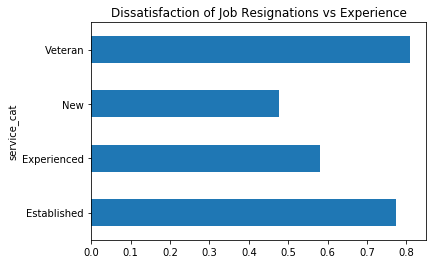

In [1223]:
%matplotlib inline

service_cat_dissatisfied.plot(kind='barh', title='Dissatisfaction of Job Resignations vs Experience', legend=False)

we completed the following tasks:

- Explored the data and figured out how to prepare it for analysis
- Corrected some of the missing values
- Dropped any data not needed for our analysis
- Renamed our columns
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way
- Combined the data
- Cleaned the institute_service column
- Handled the missing values in the dissatisfied column
- Aggregated the data